### The entropy function and the asymptotic bounds

In [1]:
from PyM import *
from math import log, sqrt

def lies(x,a=0,b=1):
    if not isinstance(x,float): 
        return False
    if x<a or isinstance(b,float) and x>b:
        return False
    return True

def entropy(x,q=2):
    if not lies(x,0,1):
        return "Error entropy: wrong parameter"
    if not isinstance(q,int): 
        return "Error entropy: q is not an integer"
    if q<2: 
        return "Error entropy: q<2"
    def lg(x): return log(x,q)
    if x==0*1.0: return 0.0
    elif x==1.0: return log(q-1,q)
    else: return x*lg(q-1) - x*lg(x) - (1-x)*lg(1-x)

def singleton(x):
    if not lies(x,0,1):
        return "Error singleton: wrong parameter"
    return 1-x

def plotkin(x):
    if not lies(x,0,1/2):
        return "Error plotkin: wrong parameter"
    return 1-2*x

def gilbert(x):
    if not lies(x,0,1):
        return "Error gilbert: wrong parameter"
    if x<=1/2: return 1-entropy(x)
    else: return 0.0


def hamming(x):
    if not lies(x,0,1):
        return "Error hamming: wrong parameter"
    return 1-entropy(x/2)
    
def elias(x):
    if not lies(x,0,0.5):
        return "Error elias: wrong parameter"
    return 1-entropy((1-sqrt(1-2*x))/2)
    
def vanlint(x):
    if not lies(x,0,0.5):
        return "Error vanlint: wrong parameter"
    return entropy(1/2 - sqrt(x*(1-x)))
    
def mceliece(x):
    if not lies(x,0,0.5):
        return "Error mceliece: wrong parameter"
    if x>0.273: return entropy(0.5-sqrt(x-x**2))
    def g(t): return entropy((1-sqrt(1-t))/2)
    h = lambda u: 1+g(u**2)-g(u**2+2*x*u+2*x)
    a = 0.0001; b=1-2*x-a; du=0.04*(1-2*x)
    return min([h(a+j*du) for j in range(25)])
    

x=0.21
show(round(entropy(x),5))

B = [singleton,plotkin,hamming,elias,vanlint,mceliece]
show([round(b(x),5)for b in B])

show(round(gilbert(0.21),5))


0.74148 

[0.79, 0.58, 0.51535, 0.47291, 0.44539, 0.43954] 

0.25852 



#### Graphics

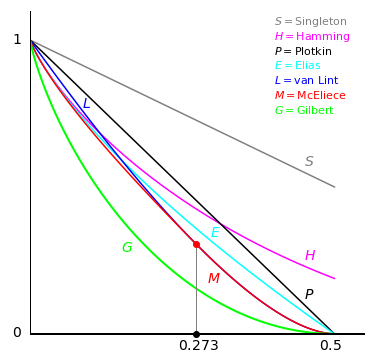

In [2]:
# Important points
tau = 0.273
O = (0,0); X=(tau,0); X1 = (0.5,0); X2 = (0.55,0); Y = (0,1); Y1 = (0,1.1)

# Curves

t = ls(0,0.5,101)

S = [singleton(s) for s in t]
H = [hamming(s) for s in t]
P = [plotkin(s) for s in t]
E = [elias(s) for s in t]
L = [vanlint(s) for s in t]
M = [mceliece(s) for s in t]

G = [gilbert(s) for s in t]
  

# plotting
close('all')

ax = plt.figure("Asymptotic bounds", figsize=(6,6))
plt.xlim(0,0.55)
plt.ylim(-0.01,1.1)
plt.axis('off')

plot(t,S,color='gray')
plot(t,H,color='magenta')
plot(t,P,color='black')
plot(t,E,color='aqua')
plot(t,L,color='blue')
plot(t,M,color='red')

plot(t,G,color='lime',lw=2)


# Lines
seg(O,X2,lw=2)
seg(O,Y1,lw=2)
seg(X,(tau,mceliece(tau)),lw=1,color='gray')

# Bullets
bullet(X,color='black')
bullet((tau,mceliece(0.273)),color='red')

# labeling
eps=0.1
lable(Y,'$1$',dx=-0.3*eps,dy=-0.15*eps,fs=14)
lable(O,'$0$',dx=-0.3*eps,dy=-0.1*eps,fs=14)
lable(X1,'$0.5$',dx=-0.25*eps,dy=-0.55*eps,fs=14)
lable(X,'$0.273$',dx=-0.3*eps,dy=-0.55*eps,fs=14)
lable((0.45,0.57),'$S$',fs=14,color='grey')
lable((0.45,0.25),'$H$',fs=14,color='magenta')
lable((0.45,0.12),'$P$',fs=14)
lable((0.15,gilbert(0.2)),'$G$',fs=14, color='lime')
lable((0.29,gilbert(0.26)),'$M$',fs=14, color='red')
lable((0.295,elias(0.29)),'$E$',fs=14, color='aqua')
lable((0.085,vanlint(0.083)),'$L$',fs=14, color='blue')
lable((0.4,1.05),'$S=$Singleton',fs=11, color='gray')
lable((0.4,1.0),'$H=$Hamming',fs=11, color='magenta')
lable((0.4,0.95),'$P=$Plotkin',fs=11, color='black')
lable((0.4,0.9),'$E=$Elias',fs=11, color='aqua')
lable((0.4,0.85),'$L=$van Lint',fs=11, color='blue')
lable((0.4,0.8),'$M=$McEliece',fs=11, color='red')
lable((0.4,0.75),'$G=$Gilbert',fs=11, color='lime')

plt.show()

Text(0.4,0.75,'$G=$Gilbert')

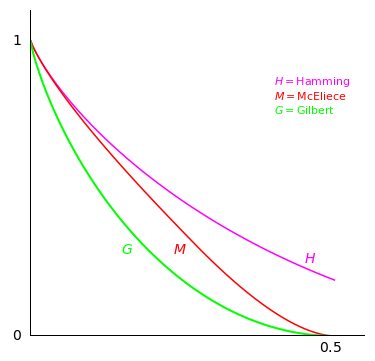

In [3]:
ax = plt.figure("Asymptotic bounds", figsize=(6,6))
plt.xlim(0,0.55)
plt.ylim(0,1.1)
plt.axis('off')


plot(t,H,color='magenta')
plot(t,M,color='red')
plot(t,G,color='lime',lw=2)

seg(O,X2,lw=3)
seg(O,Y1,lw=2)

# labeling
eps=0.1
lable(Y,'$1$',dx=-0.3*eps,dy=-0.15*eps,fs=14)
lable(O,'$0$',dx=-0.3*eps,dy=-0.1*eps,fs=14)
lable(X1,'$0.5$',dx=-0.25*eps,dy=-0.5*eps,fs=14)
lable((0.45,0.25),'$H$',fs=14,color='magenta')
lable((0.15,gilbert(0.2)),'$G$',fs=14, color='lime')
lable((0.235,gilbert(0.2)),'$M$',fs=14, color='red')
lable((0.4,0.85),'$H=$Hamming',fs=11, color='magenta')
lable((0.4,0.8),'$M=$McEliece',fs=11, color='red')
lable((0.4,0.75),'$G=$Gilbert',fs=11, color='lime')

Text(0.4,0.75,'$G=$Gilbert')

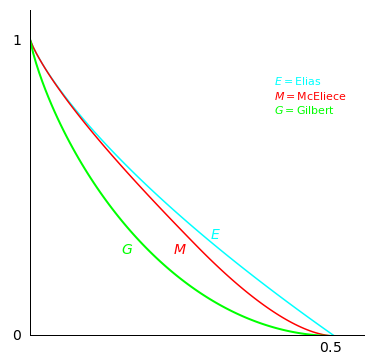

In [4]:
ax = plt.figure("Asymptotic bounds", figsize=(6,6))
plt.xlim(0,0.55)
plt.ylim(0,1.1)
plt.axis('off')


plot(t,E,color='aqua')
plot(t,M,color='red')
plot(t,G,color='lime',lw=2)

seg(O,X2,lw=3)
seg(O,Y1,lw=2)

# labeling
eps=0.1
lable(Y,'$1$',dx=-0.3*eps,dy=-0.15*eps,fs=14)
lable(O,'$0$',dx=-0.3*eps,dy=-0.1*eps,fs=14)
lable(X1,'$0.5$',dx=-0.25*eps,dy=-0.5*eps,fs=14)
lable((0.15,gilbert(0.2)),'$G$',fs=14, color='lime')
lable((0.235,gilbert(0.2)),'$M$',fs=14, color='red')
lable((0.295,elias(0.29)),'$E$',fs=14, color='aqua')
lable((0.4,0.85),'$E=$Elias',fs=11, color='aqua')
lable((0.4,0.8),'$M=$McEliece',fs=11, color='red')
lable((0.4,0.75),'$G=$Gilbert',fs=11, color='lime')

Text(0.4,0.75,'$G=$Gilbert')

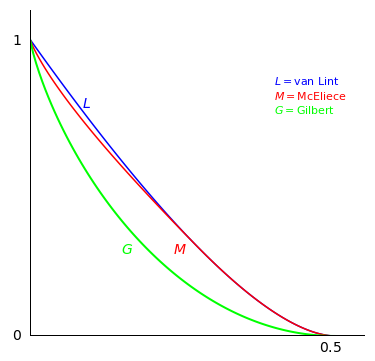

In [5]:
ax = plt.figure("Asymptotic bounds", figsize=(6,6))
plt.xlim(0,0.55)
plt.ylim(0,1.1)
plt.axis('off')


plot(t,L,color='blue')
plot(t,M,color='red')
plot(t,G,color='lime',lw=2)

seg(O,X2,lw=3)
seg(O,Y1,lw=2)

# labeling
eps=0.1
lable(Y,'$1$',dx=-0.3*eps,dy=-0.15*eps,fs=14)
lable(O,'$0$',dx=-0.3*eps,dy=-0.1*eps,fs=14)
lable(X1,'$0.5$',dx=-0.25*eps,dy=-0.5*eps,fs=14)
lable((0.15,gilbert(0.2)),'$G$',fs=14, color='lime')
lable((0.235,gilbert(0.2)),'$M$',fs=14, color='red')
lable((0.085,vanlint(0.082)),'$L$',fs=14, color='blue')
lable((0.4,0.85),'$L=$van Lint',fs=11, color='blue')
lable((0.4,0.8),'$M=$McEliece',fs=11, color='red')
lable((0.4,0.75),'$G=$Gilbert',fs=11, color='lime')